In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.data.tidy_data import performance_df, extract_complexity_df, calculate_differences
from src.results.statistical_analysis import perform_paired_tests, calculate_grouped_statistics, compare_variability_between_metrics, compare_means_between_metrics
from src.visualization.plots import plot_individual_complexity_differences, plot_complexity_differences
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_complexity = pd.read_parquet('data/results/complexity_data.parquet')
df_differences = pd.read_parquet('data/results/differences_data.parquet')

In [4]:
df_differences = round(df_differences, 4)

In [5]:
df_differences

,dataset,k,metric,dataset_complexity_global,dataset_complexity_mean_folds,majority_class_complexity_global,majority_class_complexity_mean_folds,minority_class_complexity_global,minority_class_complexity_mean_folds,dataset_complexity_difference,majority_class_complexity_difference,minority_class_complexity_difference,most_complex_class_global,least_complex_class_global,most_complex_class_mean_folds,least_complex_class_mean_folds,most_complex_class_difference,least_complex_class_difference
0,a9a,1,ddn,0.2124,0.2134,0.1454,0.1462,0.4236,0.4252,-0.0010,-0.0008,-0.0016,0.4236,0.1454,0.4252,0.1462,-0.0016,-0.0008
1,a9a,1,kdn,0.1888,0.1908,0.1295,0.1307,0.3757,0.3802,-0.0020,-0.0013,-0.0045,0.3757,0.1295,0.3802,0.1307,-0.0045,-0.0013
2,a9a,2,ddn,0.2144,0.2150,0.1468,0.1473,0.4277,0.4287,-0.0006,-0.0005,-0.0011,0.4277,0.1468,0.4287,0.1473,-0.0011,-0.0005
3,a9a,2,kdn,0.2002,0.2010,0.1387,0.1387,0.3941,0.3973,-0.0008,-0.0001,-0.0033,0.3941,0.1387,0.3973,0.1387,-0.0033,-0.0001
4,a9a,3,ddn,0.2165,0.2174,0.1486,0.1495,0.4306,0.4317,-0.0009,-0.0008,-0.0011,0.4306,0.1486,0.4317,0.1495,-0.0011,-0.0008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,yeast6,8,kdn,0.0299,0.0303,0.0170,0.0172,0.5643,0.5705,-0.0004,-0.0002,-0.0062,0.5643,0.0170,0.5705,0.0172,-0.0062,-0.0002
1370,yeast6,9,ddn,0.0320,0.0322,0.0163,0.0157,0.6820,0.7131,-0.0002,0.0005,-0.0311,0.6820,0.0163,0.7131,0.0157,-0.0311,0.0005
1371,yeast6,9,kdn,0.0297,0.0306,0.0170,0.0172,0.5556,0.5849,-0.0009,-0.0002,-0.0294,0.5556,0.0170,0.5849,0.0172,-0.0294,-0.0002
1372,yeast6,10,ddn,0.0327,0.0326,0.0161,0.0156,0.7171,0.7386,0.0000,0.0006,-0.0215,0.7171,0.0161,0.7386,0.0156,-0.0215,0.0006


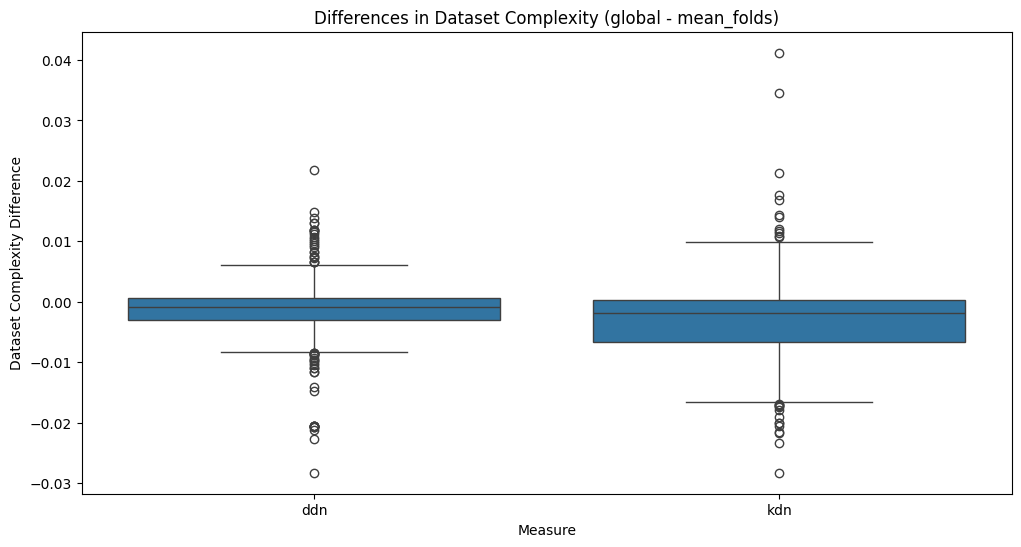

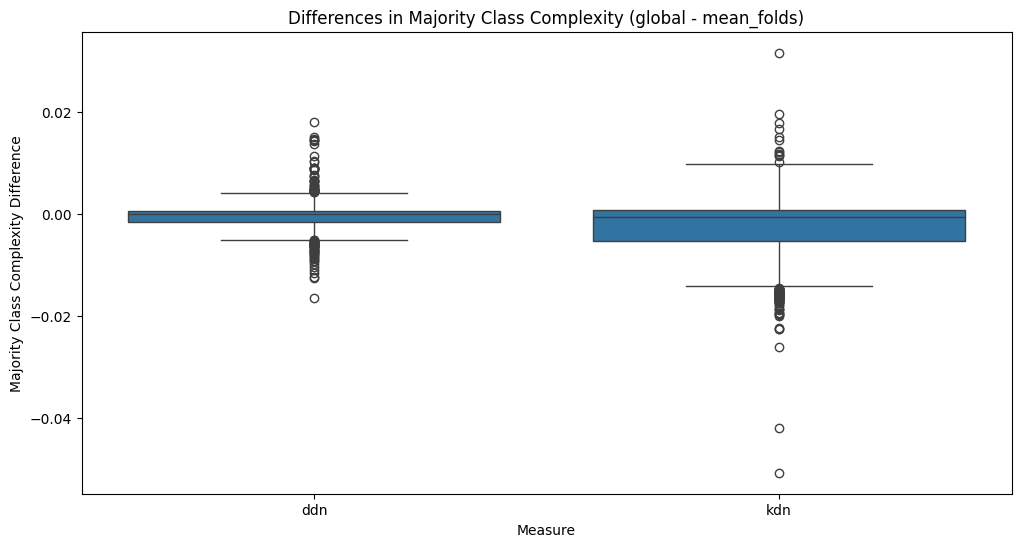

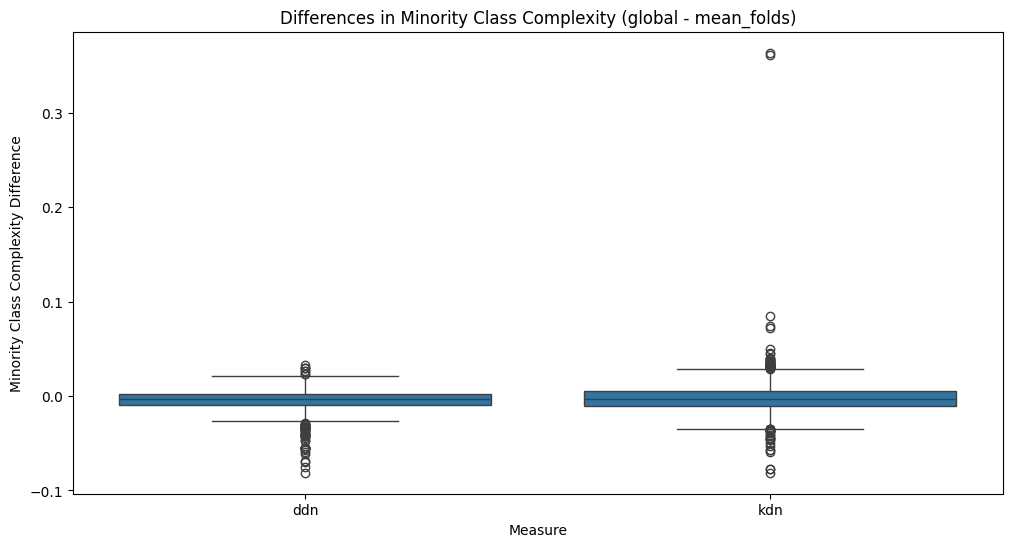

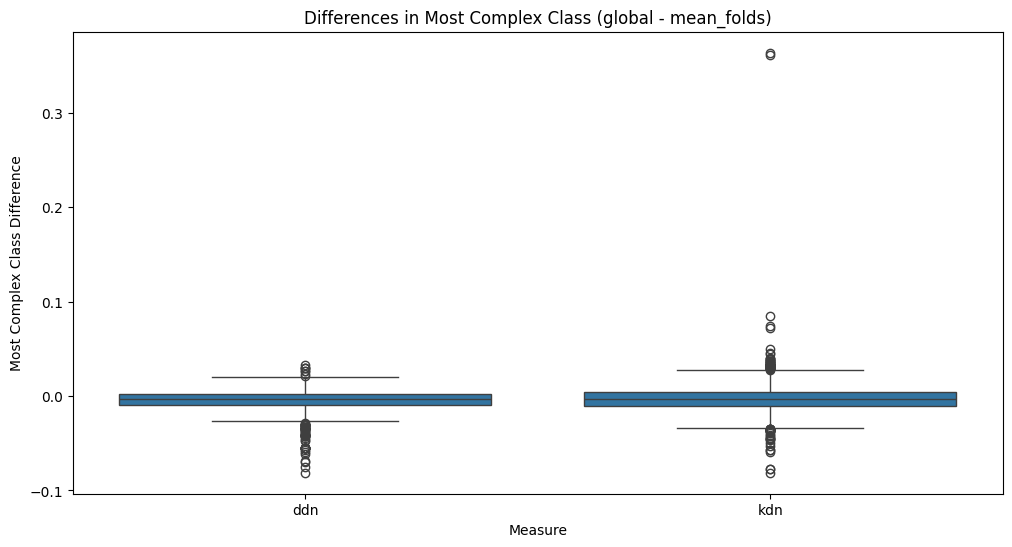

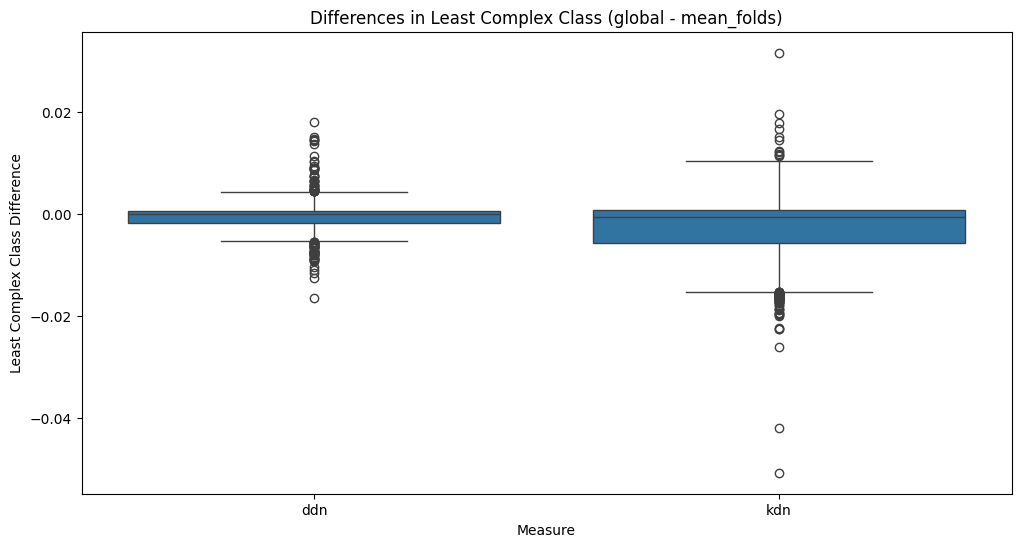

In [6]:
# Call the function to plot the five independent graphs
plot_individual_complexity_differences(df_differences)

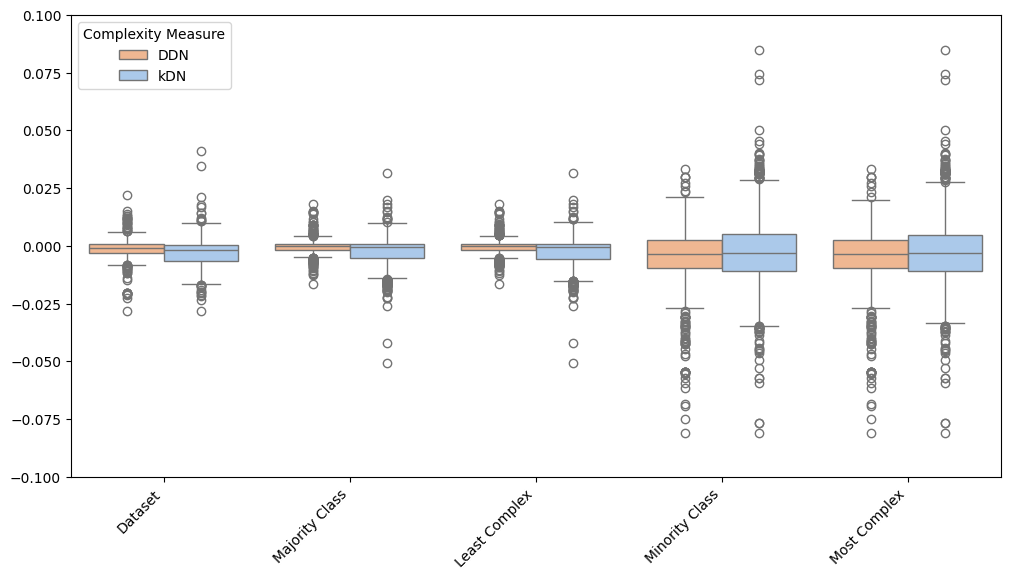

In [22]:
# Filter the columns that represent the differences in complexity
complexity_diff_columns = [col for col in df_differences.columns if col.endswith("_difference")]

# Melt the DataFrame to have a single column for the differences
df_melted = df_differences.melt(id_vars=["metric"], value_vars=complexity_diff_columns, var_name="Complexity Measure", value_name="Difference")

# Define custom labels for the complexity measures
custom_labels = {
    "dataset_complexity_difference": "Dataset",
    "majority_class_complexity_difference": "Majority Class",
    "least_complex_class_difference": "Least Complex",
    "minority_class_complexity_difference": "Minority Class",
    "most_complex_class_difference": "Most Complex"
}

# Replace the complexity measure names with the custom labels
df_melted["metric"] = df_melted["metric"].replace({"ddn": "DDN", "kdn": "kDN"})

# Define the order of the complexity measures
order = list(custom_labels.keys())
df_melted["Complexity Measure"] = pd.Categorical(df_melted["Complexity Measure"], categories=order, ordered=True)

# Define a custom palette for the plot
pastel_colors = sns.color_palette("pastel")
custom_palette = {"kDN": pastel_colors[0], "DDN": pastel_colors[1]}  # Ajustar colores según el artículo

# Apply the custom labels to the DataFrame
df_melted["Complexity Measure"] = df_melted["Complexity Measure"].map(custom_labels)

# Create the boxplot
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df_melted, x="Complexity Measure", y="Difference", hue="metric", palette=custom_palette)

# Customize the plot
plt.xticks(rotation=45, ha="right")
plt.xlabel("")
plt.ylabel("")
plt.ylim(-0.1, 0.1)
plt.title("")

# Add a legend
legend = ax.legend(title="Complexity Measure")

# Show the plot
plt.show()


In [12]:
perform_paired_tests(df_differences)


Results for measure: ddn
Comparison: dataset_complexity_global vs dataset_complexity_mean_folds - Wilcoxon signed-rank test (Outliers included):
t-statistic: 65059.000, p-value: 0.000
The difference is highly significant at the 99% confidence level (p < 0.01). There is strong evidence that the two measures are different.

Comparison: majority_class_complexity_global vs majority_class_complexity_mean_folds - Wilcoxon signed-rank test (Outliers included):
t-statistic: 92359.500, p-value: 0.001
The difference is highly significant at the 99% confidence level (p < 0.01). There is strong evidence that the two measures are different.

Comparison: minority_class_complexity_global vs minority_class_complexity_mean_folds - Wilcoxon signed-rank test (Outliers included):
t-statistic: 69592.000, p-value: 0.000
The difference is highly significant at the 99% confidence level (p < 0.01). There is strong evidence that the two measures are different.

Comparison: most_complex_class_global vs most_com

In [25]:
outliers = perform_paired_tests(df_differences, remove_outliers=True, return_outliers=True)


Results for measure: ddn
Comparison: dataset_complexity_global vs dataset_complexity_mean_folds - Wilcoxon signed-rank test (Outliers removed):
t-statistic: 66618.000, p-value: 0.000
The difference is highly significant at the 99% confidence level (p < 0.01). There is strong evidence that the two measures are different.

Comparison: majority_class_complexity_global vs majority_class_complexity_mean_folds - Wilcoxon signed-rank test (Outliers removed):
t-statistic: 67597.000, p-value: 0.000
The difference is highly significant at the 99% confidence level (p < 0.01). There is strong evidence that the two measures are different.

Comparison: minority_class_complexity_global vs minority_class_complexity_mean_folds - Wilcoxon signed-rank test (Outliers removed):
t-statistic: 70196.500, p-value: 0.000
The difference is highly significant at the 99% confidence level (p < 0.01). There is strong evidence that the two measures are different.

Comparison: most_complex_class_global vs most_comple

In [26]:
outliers

,dataset,k,metric,dataset_complexity_global,dataset_complexity_mean_folds,majority_class_complexity_global,majority_class_complexity_mean_folds,minority_class_complexity_global,minority_class_complexity_mean_folds,dataset_complexity_difference,majority_class_complexity_difference,minority_class_complexity_difference,most_complex_class_global,least_complex_class_global,most_complex_class_mean_folds,least_complex_class_mean_folds,most_complex_class_difference,least_complex_class_difference
166,bupa,8,ddn,0.473362,0.476312,0.491534,0.495029,0.454438,0.456854,-0.002949,-3.495291e-03,-0.002416,0.491534,0.454438,0.495029,0.456854,-3.495291e-03,-0.002416
168,bupa,9,ddn,0.476667,0.477087,0.496818,0.496395,0.455680,0.457013,-0.000420,4.232477e-04,-0.001332,0.496818,0.455680,0.496395,0.457013,4.232477e-04,-0.001332
170,bupa,10,ddn,0.478406,0.478587,0.498977,0.499080,0.456982,0.457275,-0.000181,-1.027678e-04,-0.000293,0.498977,0.456982,0.499080,0.457275,-1.027678e-04,-0.000293
172,bupa,11,ddn,0.480145,0.479500,0.500852,0.500486,0.458580,0.457677,0.000645,3.663558e-04,0.000903,0.500852,0.458580,0.500486,0.457677,3.663558e-04,0.000903
912,splice,2,ddn,0.332360,0.337295,0.499323,0.500586,0.153644,0.162513,-0.004935,-1.262541e-03,-0.008869,0.499323,0.153644,0.500586,0.162513,-1.262541e-03,-0.008869
914,splice,3,ddn,0.353340,0.358165,0.519516,0.520597,0.175466,0.184302,-0.004825,-1.080265e-03,-0.008836,0.519516,0.175466,0.520597,0.184302,-1.080265e-03,-0.008836
916,splice,4,ddn,0.368200,0.372273,0.529304,0.529935,0.195756,0.203516,-0.004073,-6.308795e-04,-0.007760,0.529304,0.195756,0.529935,0.203516,-6.308795e-04,-0.007760
918,splice,5,ddn,0.378570,0.382305,0.536325,0.536338,0.209710,0.217435,-0.003735,-1.256926e-05,-0.007725,0.536325,0.209710,0.536338,0.217435,-1.256926e-05,-0.007725
920,splice,6,ddn,0.386760,0.389063,0.539710,0.539124,0.223043,0.228442,-0.002303,5.855006e-04,-0.005399,0.539710,0.223043,0.539124,0.228442,5.855006e-04,-0.005399
922,splice,7,ddn,0.391730,0.394973,0.541509,0.541639,0.231408,0.237986,-0.003242,-1.298544e-04,-0.006578,0.541509,0.231408,0.541639,0.237986,-1.298544e-04,-0.006578


## Differences between kdn and ddn

In [13]:
for diff in [
        'dataset_complexity_difference',
        'majority_class_complexity_difference',
        'minority_class_complexity_difference',
        'most_complex_class_difference',
        'least_complex_class_difference'
    ]:
    print(diff)
    display(calculate_grouped_statistics(df_differences, diff=diff, x_var='metric'))
               

dataset_complexity_difference


,metric,median,mean,std,min,max,count
0,ddn,-0.0009,-0.001344,0.004496,-0.0283,0.0218,687
1,kdn,-0.0019,-0.003264,0.006883,-0.0283,0.0412,687


majority_class_complexity_difference


,metric,median,mean,std,min,max,count
0,ddn,-0.0000,-0.000328,0.003386,-0.0165,0.0181,687
1,kdn,-0.0006,-0.002902,0.007343,-0.0507,0.0317,687


minority_class_complexity_difference


,metric,median,mean,std,min,max,count
0,ddn,-0.0036,-0.005482,0.014887,-0.0812,0.0334,687
1,kdn,-0.0031,-0.001353,0.027251,-0.0812,0.3636,687


most_complex_class_difference


,metric,median,mean,std,min,max,count
0,ddn,-0.0034,-0.005467,0.014857,-0.0812,0.0334,687
1,kdn,-0.0031,-0.001369,0.027215,-0.0812,0.3636,687


least_complex_class_difference


,metric,median,mean,std,min,max,count
0,ddn,-0.0000,-0.000342,0.003473,-0.0165,0.0181,687
1,kdn,-0.0006,-0.002886,0.007417,-0.0507,0.0317,687


In [14]:
compare_variability_between_metrics(df_differences)

Comparison: dataset_complexity_difference - Levene's test between 'kdn' and 'ddn':
Statistic: 84.037, p-value: 0.000
The difference in variance is highly significant at the 99% confidence level (p < 0.01).

Comparison: majority_class_complexity_difference - Levene's test between 'kdn' and 'ddn':
Statistic: 128.700, p-value: 0.000
The difference in variance is highly significant at the 99% confidence level (p < 0.01).

Comparison: minority_class_complexity_difference - Levene's test between 'kdn' and 'ddn':
Statistic: 18.348, p-value: 0.000
The difference in variance is highly significant at the 99% confidence level (p < 0.01).

Comparison: most_complex_class_difference - Levene's test between 'kdn' and 'ddn':
Statistic: 17.754, p-value: 0.000
The difference in variance is highly significant at the 99% confidence level (p < 0.01).

Comparison: least_complex_class_difference - Levene's test between 'kdn' and 'ddn':
Statistic: 126.093, p-value: 0.000
The difference in variance is highly s

In [15]:
compare_means_between_metrics(df_differences)

Comparison: dataset_complexity_difference - Mann-Whitney U test between 'kdn' and 'ddn':
Statistic: 195971.500, p-value: 0.000
The difference in means is highly significant at the 99% confidence level (p < 0.01).

Comparison: majority_class_complexity_difference - Mann-Whitney U test between 'kdn' and 'ddn':
Statistic: 196627.500, p-value: 0.000
The difference in means is highly significant at the 99% confidence level (p < 0.01).

Comparison: minority_class_complexity_difference - Mann-Whitney U test between 'kdn' and 'ddn':
Statistic: 247381.000, p-value: 0.121
The difference in means is not statistically significant.

Comparison: most_complex_class_difference - Mann-Whitney U test between 'kdn' and 'ddn':
Statistic: 246944.000, p-value: 0.136
The difference in means is not statistically significant.

Comparison: least_complex_class_difference - Mann-Whitney U test between 'kdn' and 'ddn':
Statistic: 198292.500, p-value: 0.000
The difference in means is highly significant at the 99% c